# Supplementary Figure H in Appendix S1: Poisson spiking input 
This network is just a variation of an E-only network from the main text, with less neurons per feature population, random ER-connectivity, and input_mode "poisson" instead of "mean". Note that since fluctuations are larger in this network, the RF size varies with the random seed (see Fig H).

In [1]:
import brian2 as b2
import json 
import numpy as np
import matplotlib.pyplot as plt 
 
from brian2 import BrianLogger
BrianLogger.log_level_warn() 
BrianLogger.suppress_name('resolution_conflict') # suppress warnings about variables that exist in Brian network and global namespace

from methods import Network, tune_network_analytically, load_parameters

Constructing network...
Poisson input with indegree (np.float64(50.034341463414634), np.float64(6.690655382275966)) and off/on rates: 110.43, 208.00Hz.
Equilibrate...
[                                        ----------------------------------------
self.nRF_target=9: mean_rate_center=9, mean_rate_edge=9 Hz
Stimulus on...
[                                        ----------------------------------------
self.nRF_target=9: mean_rate_center=138, mean_rate_edge=11 Hz
[                                        ----------------------------------------
self.nRF_target=9: mean_rate_center=159, mean_rate_edge=11 Hz
[                                        ----------------------------------------
self.nRF_target=9: mean_rate_center=166, mean_rate_edge=13 Hz
[                                        ----------------------------------------
self.nRF_target=9: mean_rate_center=160, mean_rate_edge=10 Hz
Indegrees (mean, SD): self.Kee=(np.float64(149.75024390243902), np.float64(11.652897156314111)), self

100%|██████████| 41/41 [00:00<00:00, 13975.33it/s]


Simulated RF size: 9.06


100%|██████████| 410/410 [00:00<00:00, 496.28it/s]


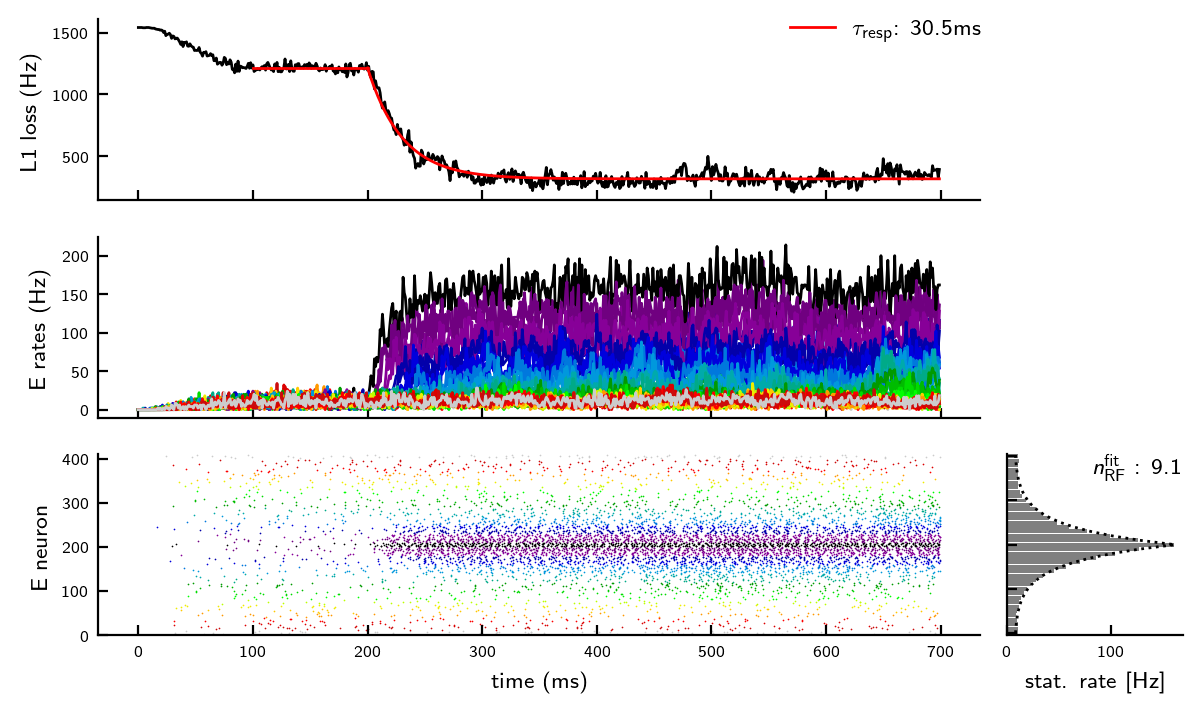

In [ ]:
# parameters to be adjusted w.r.t. Fig 8:
params_adjust =  {'Ne': 500, 'fix_indegree': False, 'input_mode':'poisson',
                  'Nx': 500, 
                  'p_ex': 0.1, 
                  'J_ex': 2.5, # the larger the FF weight, the stronger the fluctuations in network activity, and potential deviations from target RF
                  'seed': 0 # choose a different seed to see a different random realization 
                  }

# construct a network with default parameters of Fig 8 but with the parameters adjustments above: 
net = Network(params_default_file = 'main_E_nRF-9', params_adjust = params_adjust) # initialize network 
net.simulate(Tsim = 500, Tinit = 200, print_schedule=False) # create network and simulate for 700 ms
net.postproc(offset = 300) 
fig, ax = net.plot_sim() 

Poisson input adds a small amount of extra noise ($\sigma_\mathrm{poi}$), in addition to constant background noise ($\sigma_\mathrm{bg}$):

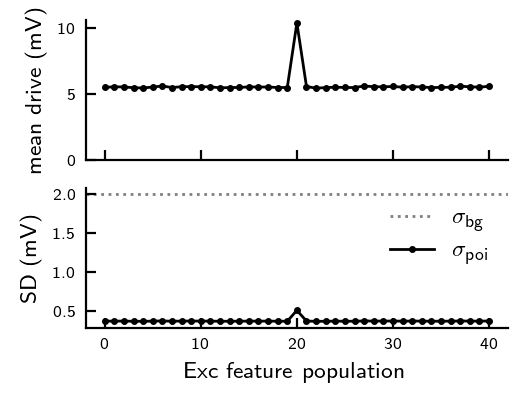

In [3]:
net.plot_stimulation();